This project will utilize 2 different machine learning classifiers to try and reach the highest possiable accuarcy in predicting whether someone has parkinsons according to the UCI ML Parkinsons dataset. This Data set uses the status column to indicate whether someone has Parkinsons or not. A value of 1 means the persons has Parkinosons, and a value of 0 means a person does not have Parkinosons.

In [30]:
import numpy as np
import pandas as pd 
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
ParkinsonsData  = pd.read_csv("parkinsons.data")
ParkinsonsData= ParkinsonsData.drop('name',1)
ParkinsonsData

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


The name collumn is dropped as it is not neccesacry. Idintifiaction of patients will not aid our models ability to learn later in the proccess, all we need is test results. 

In [32]:
ParkinsonsData.shape

(195, 23)

Using pandas shape property we can see that the file has a total of 195 columns, out of curioustiy I'll check to see the number of entries with parkinsons and the number of entries without parkinsons.

In [33]:
hasParkinsons = ParkinsonsData.loc[ParkinsonsData.status == 1]
DoesNotHavePD = ParkinsonsData.loc[ParkinsonsData.status == 0]

In [34]:
hasParkinsons.shape

(147, 23)

In [35]:
DoesNotHavePD.shape

(48, 23)

As we can see, this data set is composed of 147 entries of people with parkinsons and 48 people without parkinsons.

In [36]:
PDNoStatus = ParkinsonsData.loc[:, ParkinsonsData.columns != 'status']
status = (ParkinsonsData.status).values

In [37]:
scaler = MinMaxScaler((0,1))
scaledPD = scaler.fit_transform(PDNoStatus)

In [38]:
X = scaledPD
y = status

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

Do to the fact that the data set is only 195 entries, I will leave out 25% of the data for validation to ensure the model sees enough entries in the training process.

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestClassifier(n_estimators=100, random_state=0)


In [40]:
from sklearn.metrics import accuracy_score

model_1.fit(X_train, y_train)
preds = model_1.predict(X_val)

accuracy = accuracy_score(y_val, preds)
print("Model Accuracy:")
print(accuracy * 100)

Model Accuracy:
91.83673469387756


Now we will use Keras Sequential Classifeir to build a model and compare the accuracy score. 

In [41]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Minimum validation loss: 0.17243103682994843


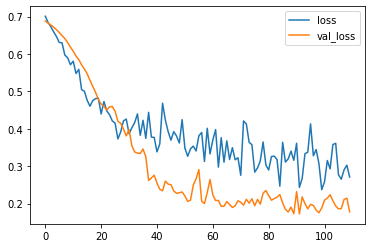

In [43]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
model_2 = keras.Sequential([

    
    layers.Dense(32, activation= 'relu', kernel_initializer = 'random_normal', input_dim = 22),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(16, activation= 'relu', kernel_initializer = 'random_normal'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(8, activation= 'relu', kernel_initializer = 'random_normal'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(1, activation= 'sigmoid', kernel_initializer = 'random_normal'),   
])

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model_2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=10,
    epochs=1000,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))


In [44]:
tscores = model_2.evaluate(X_val, y_val)
print("Test Accuracy: %.2f%%" %(tscores[1]*100))

2/2 [==============================] - 0s 5ms/step - loss: 0.1730 - accuracy: 0.9388
Test Accuracy: 93.88%
